In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("data.csv")
data2 = pd.read_csv("yonelimfinal.csv")
data3 = pd.read_csv("datav2.csv")

data = pd.concat([data, data2, data3], axis = 0)
data = data.drop(columns="Timestamp")

x = data.shape
data.head() 
print(x)

(1361, 15)


In [8]:
data = data.rename(columns = {"Cinsiyet":"Gender", "Yas":"Age", "Bolge":"Region", "Egitim":"Education", "soru1":"GOOD_ECONOMY", "soru2":"SUPPORT_EDUCATIONAL_REFORM", "soru3":"STOP_PRIVATIZATION",
                            "soru4":"DEATH_PENALTY", "soru5": "FREE_MEDIA", "soru6": "SUPPORT_ALCOHOL_BAN",
                            "soru7":"SUPPORT_SECULARISM", "soru8":"SUPPORT_ABORTION_BAN", "soru9":"OHAL_LIMITS_FREEDOM",
                            "soru10":"SUPPORT_NEW_PARTIES", "parti": "Party"})

data = data.replace("Hayır", "No")
data = data.replace("Evet", "Yes")
data = data.replace("Lisans", "Bachelor Degree")
data = data.replace("Ön Lisans", "Associate Degree")
data = data.replace("Lisans Üstü", "Masters Degree")
data = data.replace("Ortaokul", "Middle School")
data = data.replace("İlkokul", "Primary School")
data = data.replace("Lise", "Highschool")
data = data.replace("DIĞER", "OTHER")
data = data.replace("Erkek", "Male")
data = data.replace("Güneydoğu", "Guneydogu")
data = data.replace("İç Anadolu", "Ic Anadolu")
data = data.replace("Doğu Anadolu", "Dogu Anadolu")
data = data.replace("Kadın", "Female")

data.head()

,Gender,Age,Region,Education,GOOD_ECONOMY,SUPPORT_EDUCATIONAL_REFORM,STOP_PRIVATIZATION,DEATH_PENALTY,FREE_MEDIA,SUPPORT_ALCOHOL_BAN,SUPPORT_SECULARISM,SUPPORT_ABORTION_BAN,OHAL_LIMITS_FREEDOM,SUPPORT_NEW_PARTIES,Party
0,Male,18-30,Marmara,Bachelor Degree,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,IYI PARTI
1,Male,18-30,Marmara,Bachelor Degree,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,AKP
2,Female,18-30,Marmara,Bachelor Degree,No,Yes,No,No,No,No,Yes,No,Yes,Yes,OTHER
3,Male,0-18,Marmara,Highschool,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,IYI PARTI
4,Male,18-30,Marmara,Associate Degree,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,IYI PARTI


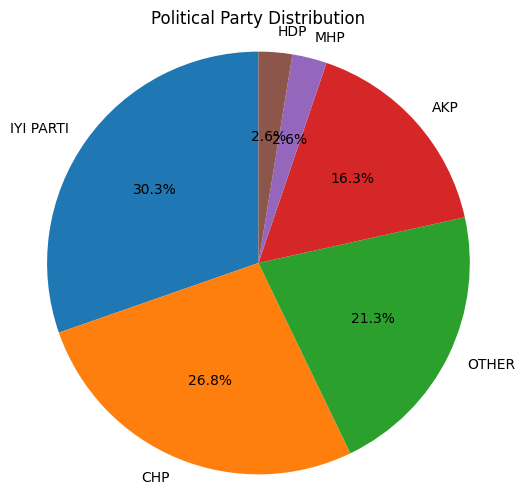

In [9]:
party_counts = data['Party'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%', startangle=90,)
plt.title('Political Party Distribution')
plt.axis('equal')  
plt.show()

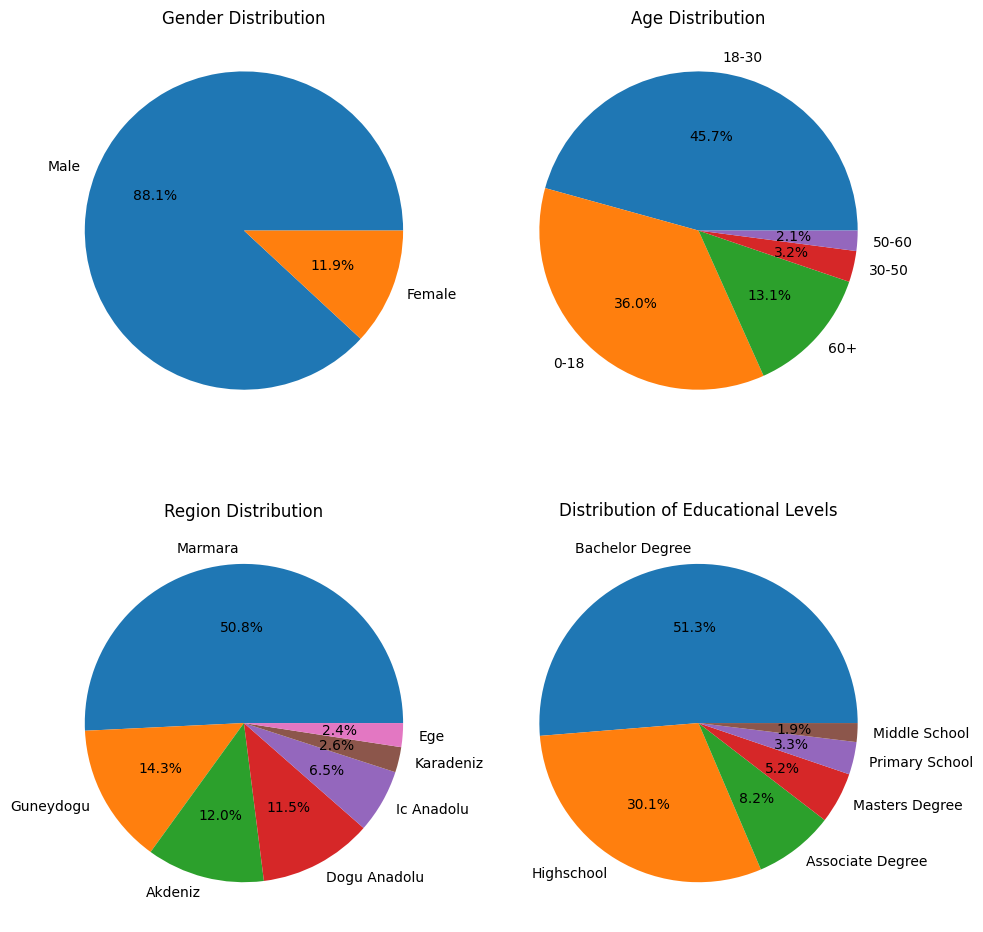

In [10]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


axs[0, 0].pie(data['Gender'].value_counts(), labels=data['Gender'].unique(), autopct='%.1f%%')
axs[0, 0].set_title("Gender Distribution")

axs[0, 1].pie(data['Age'].value_counts(), labels=data['Age'].unique(), autopct='%.1f%%')
axs[0, 1].set_title("Age Distribution")

axs[1, 0].pie(data['Region'].value_counts(), labels=data['Region'].unique(), autopct='%.1f%%')
axs[1, 0].set_title("Region Distribution")

axs[1, 1].pie(data['Education'].value_counts(), labels=data['Education'].unique(), autopct='%.1f%%')
axs[1, 1].set_title("Distribution of Educational Levels")

plt.tight_layout()

plt.show()

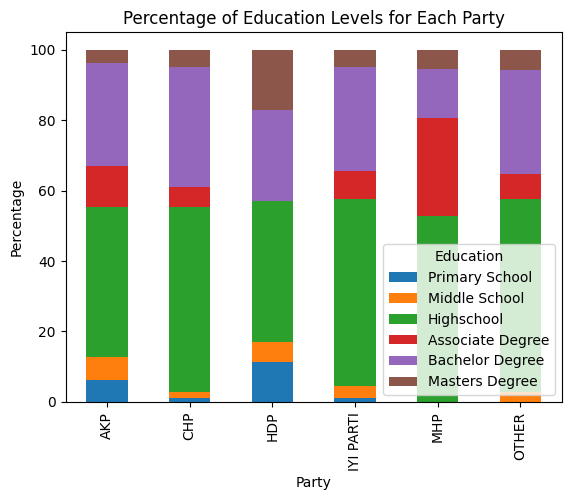

In [11]:

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

pivot_table = data.pivot_table(index='Party', columns='Education', aggfunc='size', fill_value=0)
percentage_table = pivot_table.apply(lambda x: x / x.sum() * 100, axis=1)

percentage_table = percentage_table.reindex(columns=education_order)

percentage_table.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.title('Percentage of Education Levels for Each Party')
plt.legend(title='Education')
plt.show()

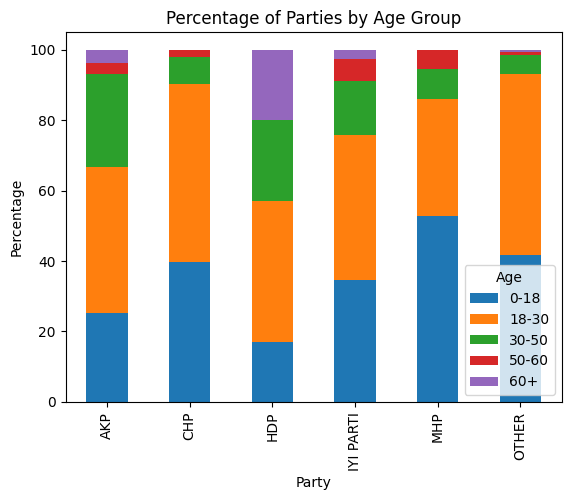

In [12]:
pivot_table = data.pivot_table(index='Party', columns='Age', aggfunc='size', fill_value=0)
percentage_table = pivot_table.apply(lambda x: x / x.sum() * 100, axis=1)

percentage_table.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.title('Percentage of Parties by Age Group')
plt.legend(title='Age')
plt.show()

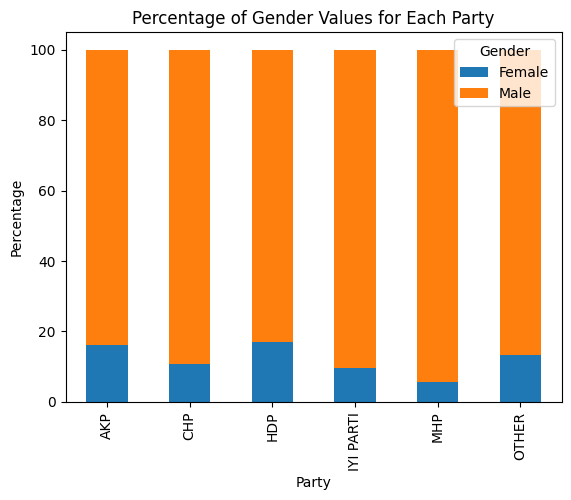

In [13]:

pivot_table = data.pivot_table(index='Party', columns='Gender', aggfunc='size', fill_value=0)
percentage_table = pivot_table.apply(lambda x: x / x.sum() * 100, axis=1)

percentage_table.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.title('Percentage of Gender Values for Each Party')
plt.legend(title='Gender')
plt.show()

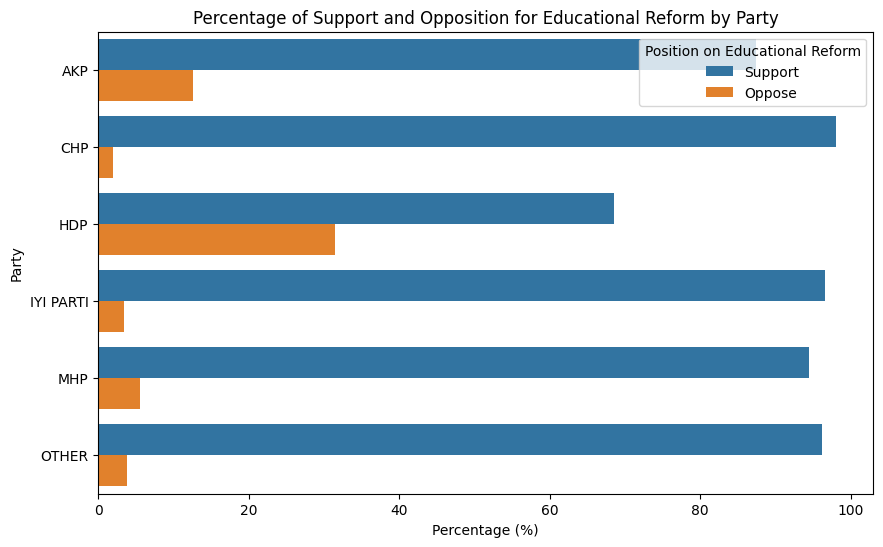

In [14]:
def calculate_percentage(position, position_label):
    party_position = data[data['SUPPORT_EDUCATIONAL_REFORM'] == position].groupby('Party').size()
    percentage = (party_position / total_by_party * 100).reset_index(name='Percentage')
    percentage['Position'] = position_label
    return percentage

total_by_party = data.groupby('Party').size()

percentage_support = calculate_percentage('Yes', 'Support')
percentage_oppose = calculate_percentage('No', 'Oppose')

percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Party', x='Percentage', hue='Position', data=percentage_data, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Party')
plt.title('Percentage of Support and Opposition for Educational Reform by Party')
plt.legend(title='Position on Educational Reform')
plt.show()

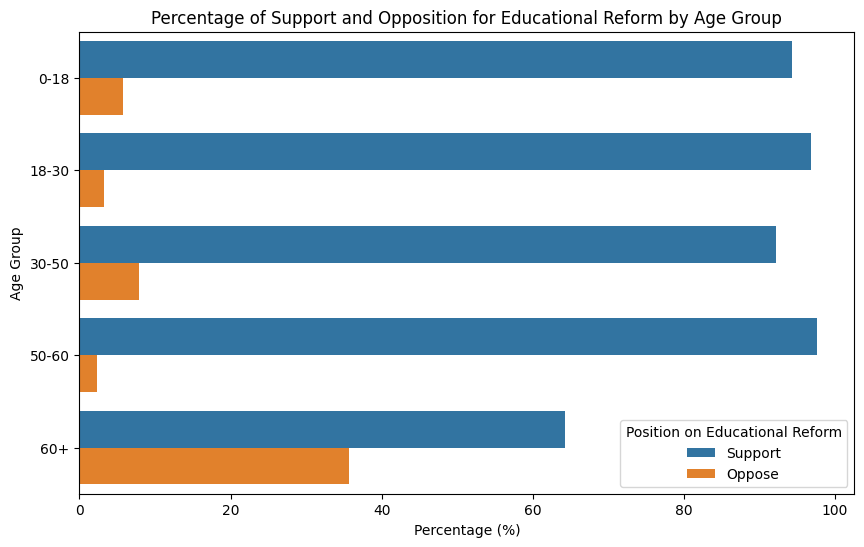

In [15]:
def calculate_percentage(position, position_label):
    party_position = data[data['SUPPORT_EDUCATIONAL_REFORM'] == position].groupby('Age').size()
    percentage = (party_position / total_by_party * 100).reset_index(name='Percentage')
    percentage['Position'] = position_label
    return percentage

total_by_party = data.groupby('Age').size()

percentage_support = calculate_percentage('Yes', 'Support')
percentage_oppose = calculate_percentage('No', 'Oppose')

percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Percentage', hue='Position', data=percentage_data, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Percentage of Support and Opposition for Educational Reform by Age Group')
plt.legend(title='Position on Educational Reform')
plt.show()

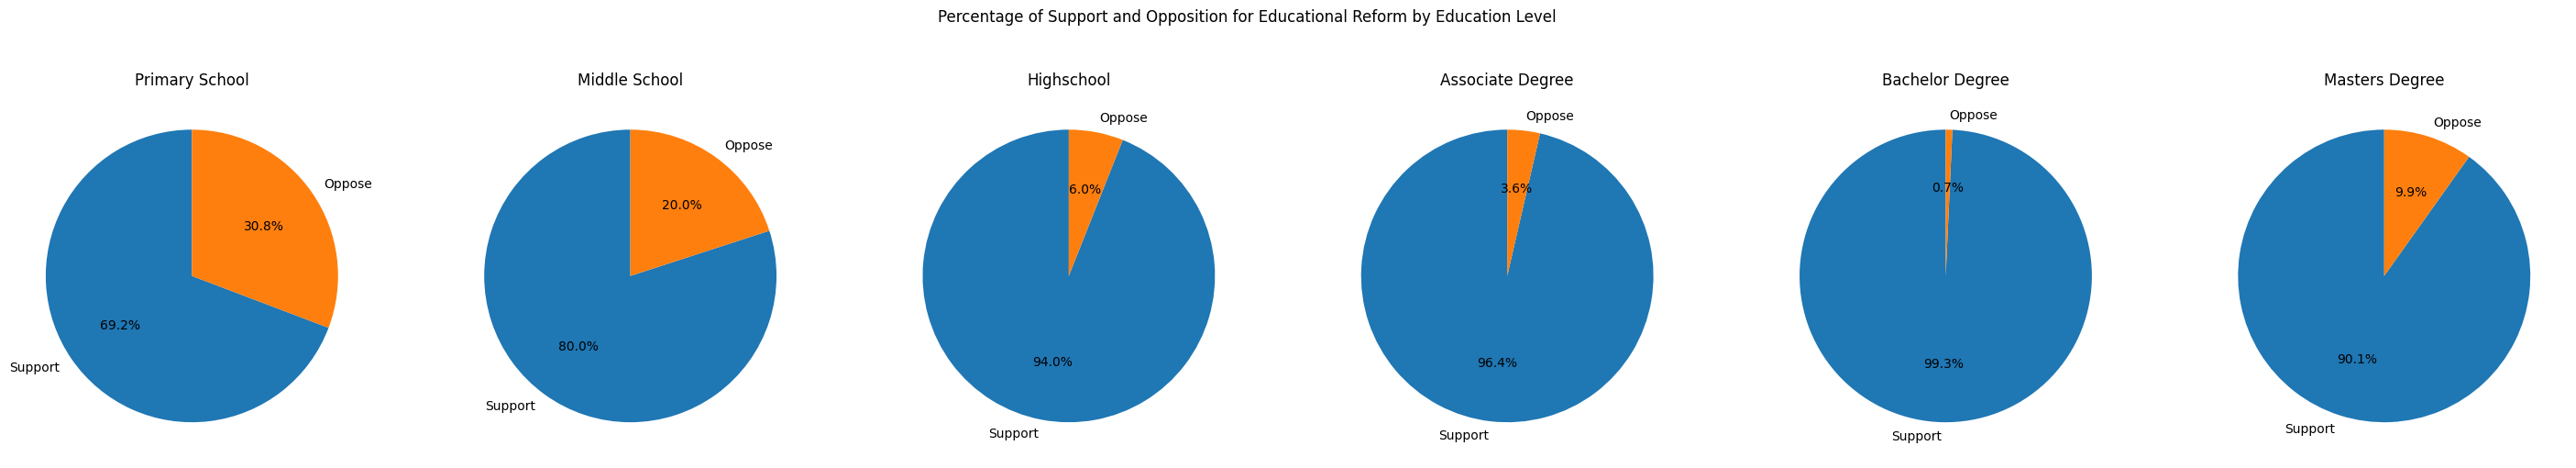

In [16]:
def calculate_percentage_for_group(group_condition, position_label):
    group_data = data[data['SUPPORT_EDUCATIONAL_REFORM'] == group_condition].groupby('Education').size()
    total_data = data.groupby('Education').size()
    percentage_group = (group_data / total_data * 100).reset_index(name='Percentage')
    percentage_group['Position'] = position_label
    return percentage_group

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_support_edu = calculate_percentage_for_group('Yes', 'Support')
percentage_oppose_edu = calculate_percentage_for_group('No', 'Oppose')
percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])

percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

# Create subplots
fig, axs = plt.subplots(1, len(education_order), figsize=(len(education_order)*6, 6))

for i, edu in enumerate(education_order):
    data_for_edu = percentage_data_edu[percentage_data_edu['Education'] == edu]
    axs[i].pie(data_for_edu['Percentage'], labels=data_for_edu['Position'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(edu)

plt.suptitle('Percentage of Support and Opposition for Educational Reform by Education Level')
plt.show()

<ipython-input-17-eab38cca598b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


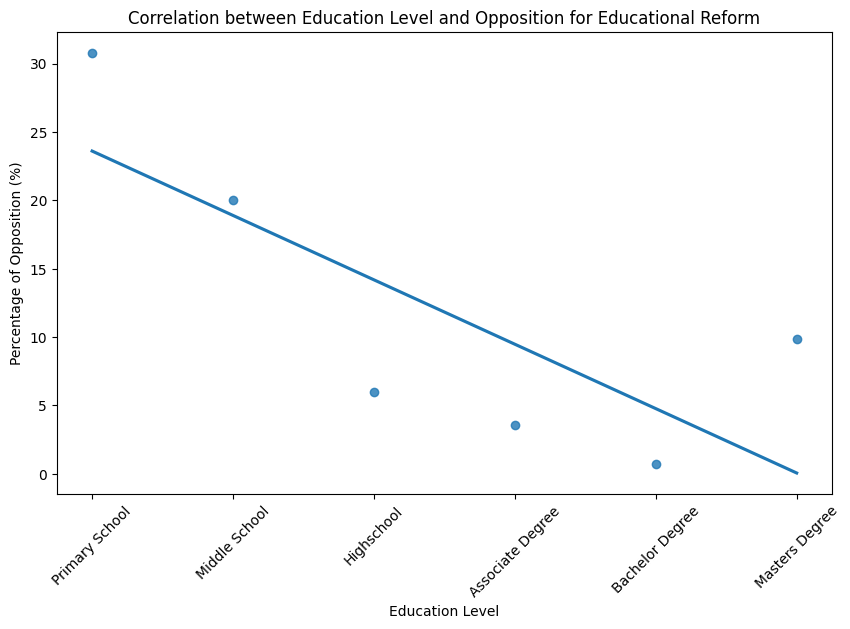

In [17]:
def calculate_percentage_for_group(condition, position_label):
    group = data[data['SUPPORT_EDUCATIONAL_REFORM'] == condition].groupby('Education').size()
    total = data.groupby('Education').size()
    percentage_group = (group / total * 100).reset_index(name='Percentage')
    percentage_group['Position'] = position_label
    return percentage_group

def create_plot(scatter_data, education_order, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None)
    plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_support_edu = calculate_percentage_for_group('Yes', 'Support')
percentage_oppose_edu = calculate_percentage_for_group('No', 'Oppose')

percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])
percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Oppose']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

create_plot(scatter_data, education_order, 'Education Level', 'Percentage of Opposition (%)', 'Correlation between Education Level and Opposition for Educational Reform')

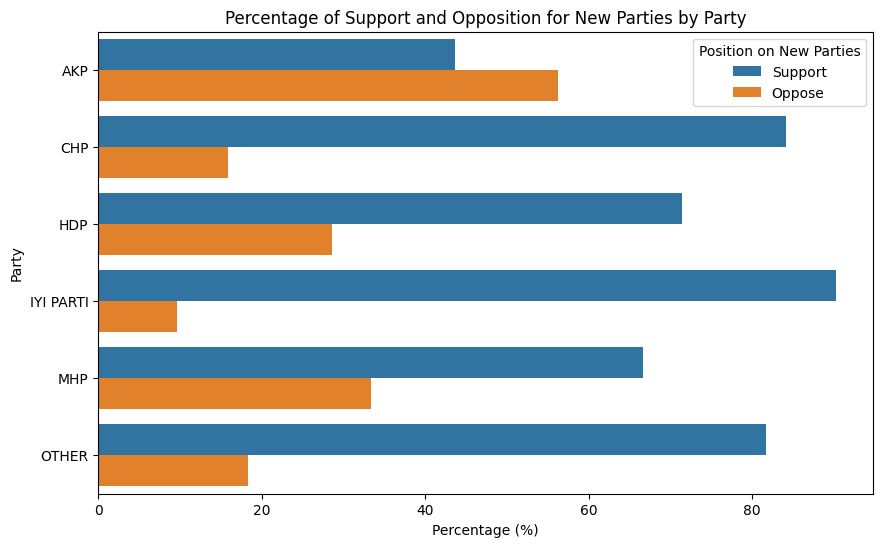

In [18]:
def calculate_percentage(position, position_label):
    party_position = data[data['SUPPORT_NEW_PARTIES'] == position].groupby('Party').size()
    percentage = (party_position / total_by_party * 100).reset_index(name='Percentage')
    percentage['Position'] = position_label
    return percentage

total_by_party = data.groupby('Party').size()

percentage_support = calculate_percentage('Yes', 'Support')
percentage_oppose = calculate_percentage('No', 'Oppose')

percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Party', x='Percentage', hue='Position', data=percentage_data, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Party')
plt.title('Percentage of Support and Opposition for New Parties by Party')
plt.legend(title='Position on New Parties')
plt.show()

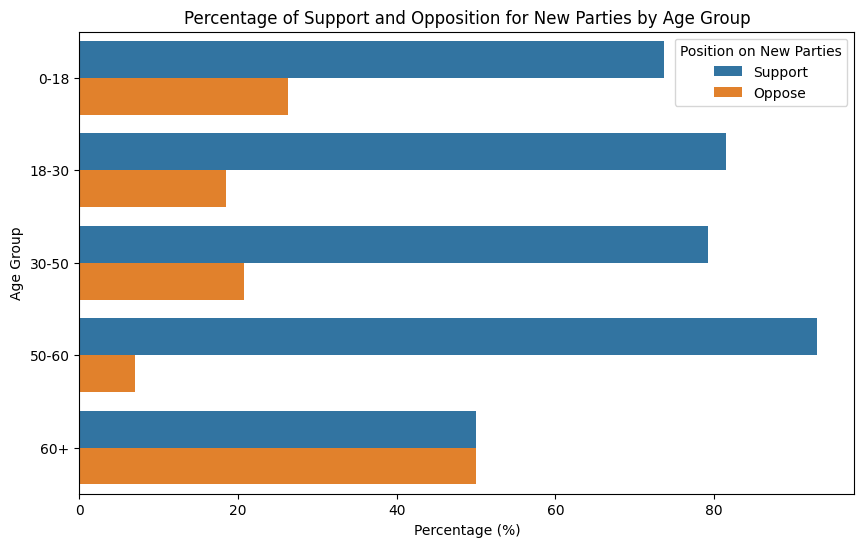

In [19]:
def calculate_percentage(position, position_label):
    party_position = data[data['SUPPORT_NEW_PARTIES'] == position].groupby('Age').size()
    percentage = (party_position / total_by_party * 100).reset_index(name='Percentage')
    percentage['Position'] = position_label
    return percentage

total_by_party = data.groupby('Age').size()

percentage_support = calculate_percentage('Yes', 'Support')
percentage_oppose = calculate_percentage('No', 'Oppose')

percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Percentage', hue='Position', data=percentage_data, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Percentage of Support and Opposition for New Parties by Age Group')
plt.legend(title='Position on New Parties')
plt.show()

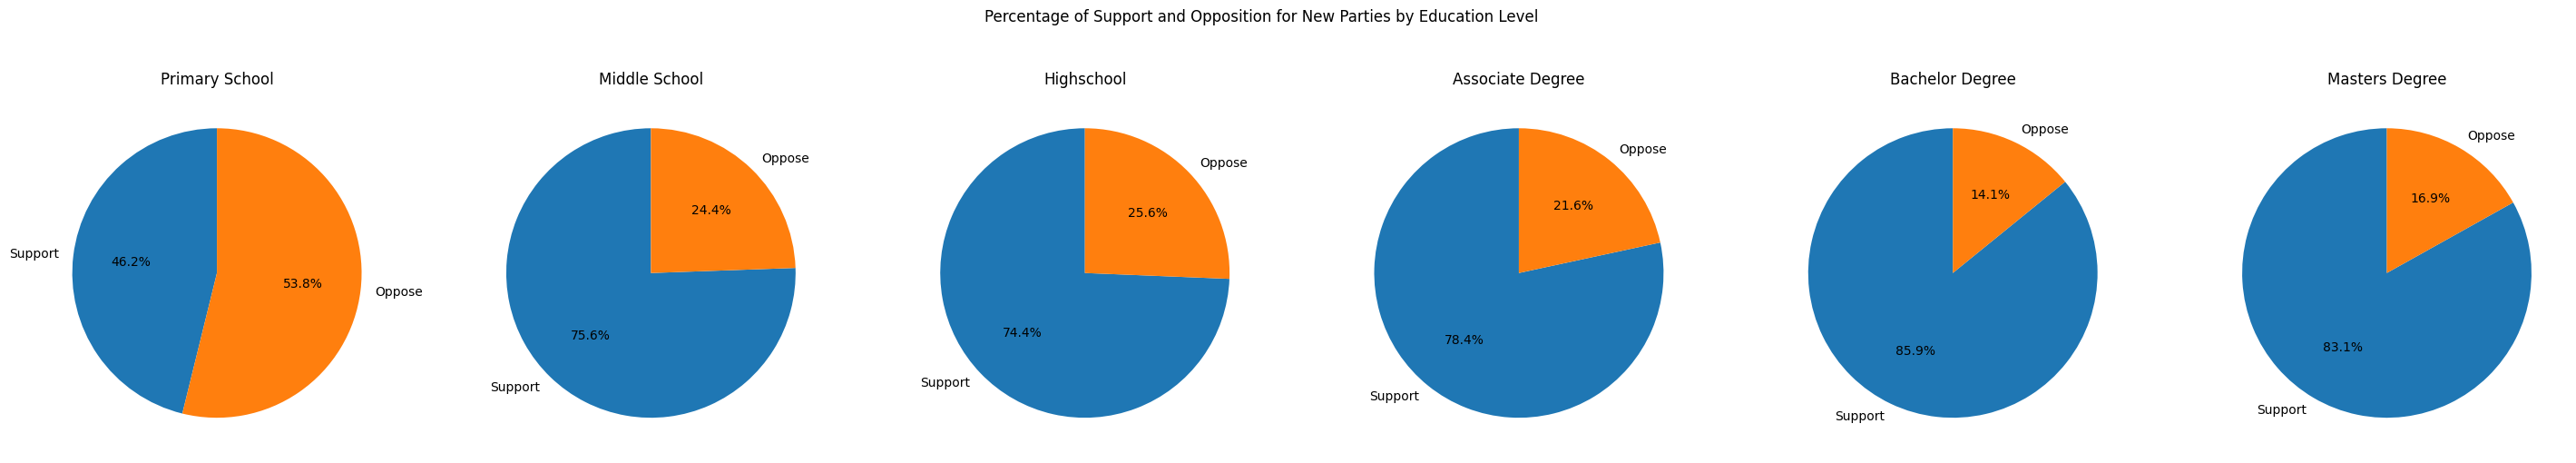

In [20]:
def calculate_percentage_for_group(group_condition, position_label):
    group_data = data[data['SUPPORT_NEW_PARTIES'] == group_condition].groupby('Education').size()
    total_data = data.groupby('Education').size()
    percentage_group = (group_data / total_data * 100).reset_index(name='Percentage')
    percentage_group['Position'] = position_label
    return percentage_group

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_support_edu = calculate_percentage_for_group('Yes', 'Support')
percentage_oppose_edu = calculate_percentage_for_group('No', 'Oppose')
percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])

percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

fig, axs = plt.subplots(1, len(education_order), figsize=(len(education_order)*6, 6))

for i, edu in enumerate(education_order):
    data_for_edu = percentage_data_edu[percentage_data_edu['Education'] == edu]
    axs[i].pie(data_for_edu['Percentage'], labels=data_for_edu['Position'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(edu)

plt.suptitle('Percentage of Support and Opposition for New Parties by Education Level')
plt.show()

<ipython-input-21-e30f3bf436be>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


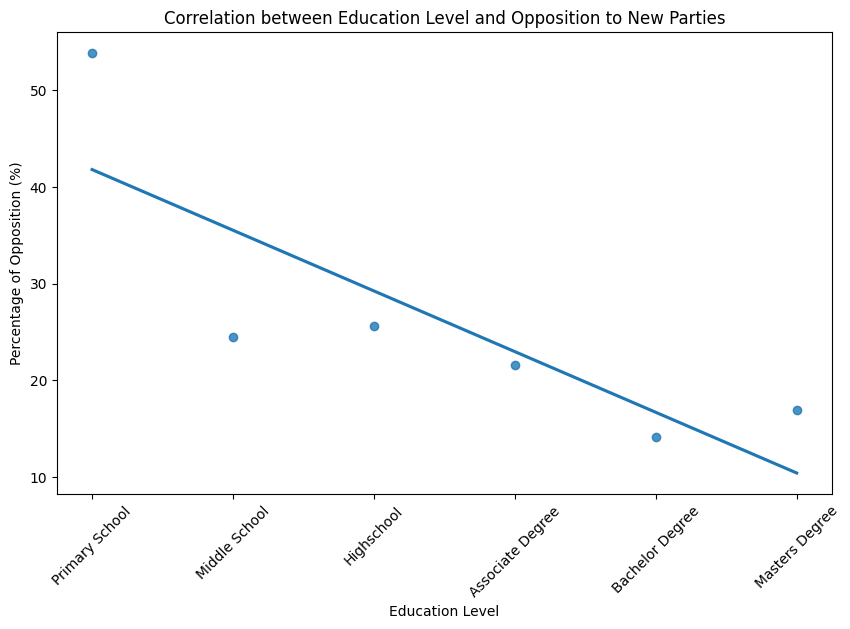

In [21]:
def calculate_percentage_for_group(condition, position_label):
    group = data[data['SUPPORT_NEW_PARTIES'] == condition].groupby('Education').size()
    total = data.groupby('Education').size()
    percentage_group = (group / total * 100).reset_index(name='Percentage')
    percentage_group['Position'] = position_label
    return percentage_group

def create_plot(scatter_data, education_order, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None)
    plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_support_edu = calculate_percentage_for_group('Yes', 'Support')
percentage_oppose_edu = calculate_percentage_for_group('No', 'Oppose')

percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])
percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Oppose']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

create_plot(scatter_data, education_order, 'Education Level', 'Percentage of Opposition (%)', 'Correlation between Education Level and Opposition to New Parties')

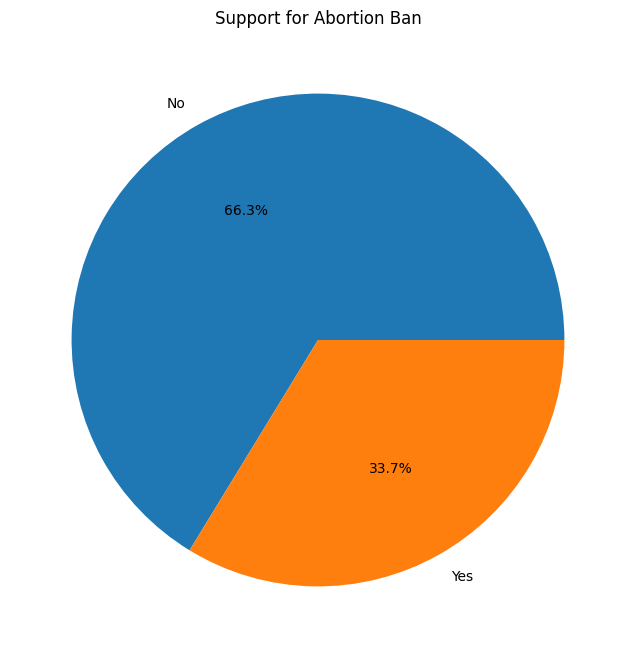

In [22]:
abortion_support = data['SUPPORT_ABORTION_BAN'].value_counts(normalize=True) * 100
abortion_support.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Support for Abortion Ban')
plt.ylabel('')
plt.show()

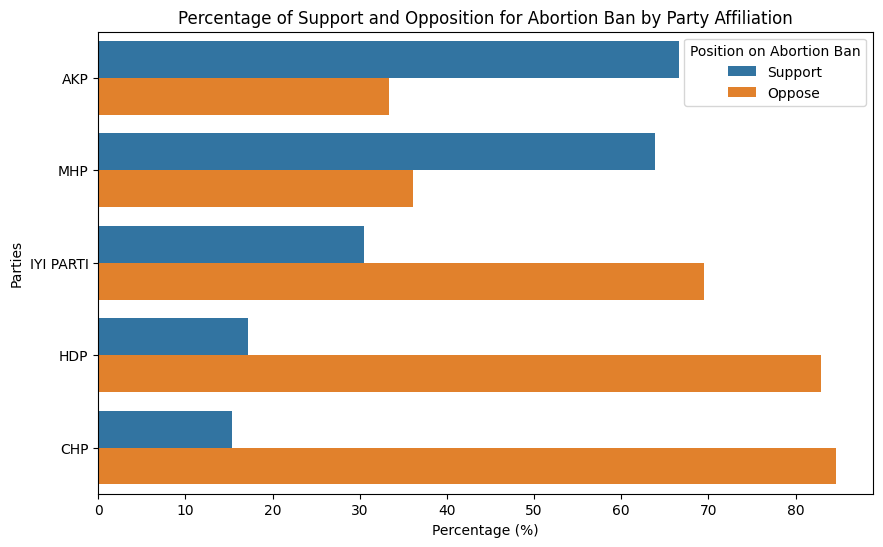

In [23]:
support_abortion_ban_party = data[data['SUPPORT_ABORTION_BAN'] == 'Yes'].groupby('Party').size()
oppose_abortion_ban_party = data[data['SUPPORT_ABORTION_BAN'] == 'No'].groupby('Party').size()
total_by_party = data.groupby('Party').size()
percentage_support_party = (support_abortion_ban_party / total_by_party * 100).reset_index(name='Percentage')
percentage_oppose_party = (oppose_abortion_ban_party / total_by_party * 100).reset_index(name='Percentage')

percentage_support_party['Position'] = 'Support'
percentage_oppose_party['Position'] = 'Oppose'
percentage_data_party = pd.concat([percentage_support_party, percentage_oppose_party])


party_order = ['AKP', 'MHP', 'IYI PARTI', 'HDP', 'CHP']

percentage_data_party['Party'] = pd.Categorical(percentage_data_party['Party'], categories=party_order, ordered=True)
percentage_data_party = percentage_data_party.sort_values('Party')

plt.figure(figsize=(10, 6))
sns.barplot(y='Party', x='Percentage', hue='Position', data=percentage_data_party, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Parties')
plt.title('Percentage of Support and Opposition for Abortion Ban by Party Affiliation')
plt.legend(title='Position on Abortion Ban')
plt.show()

<Figure size 1000x600 with 0 Axes>

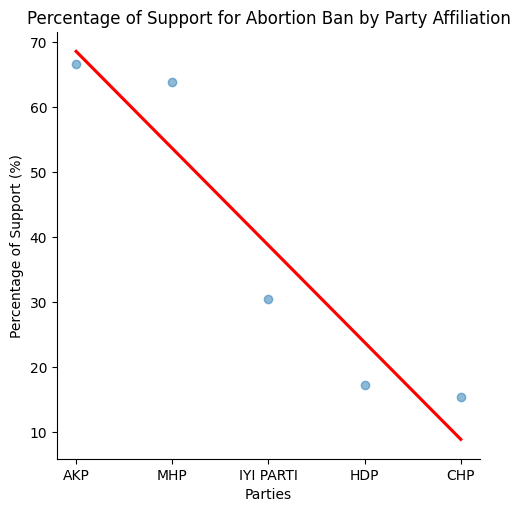

In [24]:
party_mapping = {party: i for i, party in enumerate(party_order)}
percentage_support_party['PartyMapped'] = percentage_support_party['Party'].map(party_mapping)

plt.figure(figsize=(10, 6))
sns.lmplot(data=percentage_support_party, x='PartyMapped', y='Percentage', order=1, ci=None, line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Parties')
plt.ylabel('Percentage of Support (%)')
plt.title('Percentage of Support for Abortion Ban by Party Affiliation')
plt.xticks(list(party_mapping.values()), list(party_mapping.keys()))
plt.show()

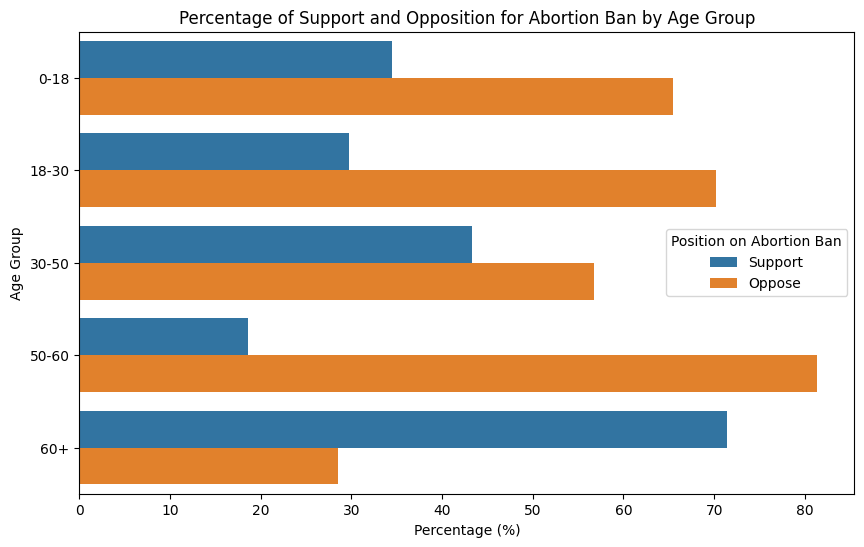

In [25]:
support_abortion_ban_age = data[data['SUPPORT_ABORTION_BAN'] == 'Yes'].groupby('Age').size()
oppose_abortion_ban_age = data[data['SUPPORT_ABORTION_BAN'] == 'No'].groupby('Age').size()
total_by_age = data.groupby('Age').size()
percentage_support_age = (support_abortion_ban_age / total_by_age * 100).reset_index(name='Percentage')
percentage_oppose_age = (oppose_abortion_ban_age / total_by_age * 100).reset_index(name='Percentage')

percentage_support_age['Position'] = 'Support'
percentage_oppose_age['Position'] = 'Oppose'
percentage_data_age = pd.concat([percentage_support_age, percentage_oppose_age])

plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Percentage', hue='Position', data=percentage_data_age, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Percentage of Support and Opposition for Abortion Ban by Age Group')
plt.legend(title='Position on Abortion Ban')
plt.show()

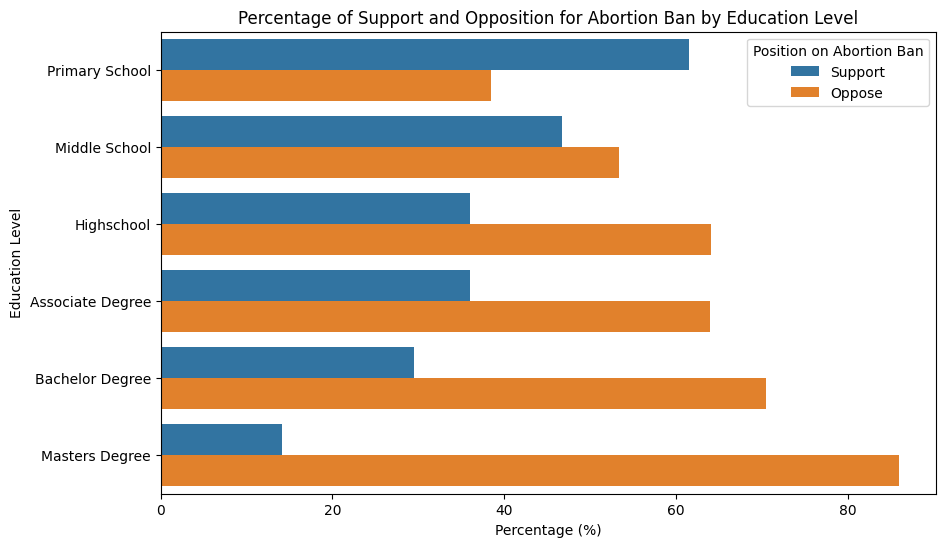

In [26]:
support_abortion_ban_edu = data[data['SUPPORT_ABORTION_BAN'] == 'Yes'].groupby('Education').size()
oppose_abortion_ban_edu = data[data['SUPPORT_ABORTION_BAN'] == 'No'].groupby('Education').size()
total_by_edu = data.groupby('Education').size()
percentage_support_edu = (support_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')
percentage_oppose_edu = (oppose_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')

percentage_support_edu['Position'] = 'Support'
percentage_oppose_edu['Position'] = 'Oppose'
percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])


education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

support_abortion_ban_edu = data[data['SUPPORT_ABORTION_BAN'] == 'Yes'].groupby('Education').size()
oppose_abortion_ban_edu = data[data['SUPPORT_ABORTION_BAN'] == 'No'].groupby('Education').size()
total_by_edu = data.groupby('Education').size()

plt.figure(figsize=(10, 6))
sns.barplot(y='Education', x='Percentage', hue='Position', data=percentage_data_edu, orient='h')
plt.xlabel('Percentage (%)')
plt.ylabel('Education Level')
plt.title('Percentage of Support and Opposition for Abortion Ban by Education Level')
plt.legend(title='Position on Abortion Ban')
plt.show()

<ipython-input-27-8bf5e86b156e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


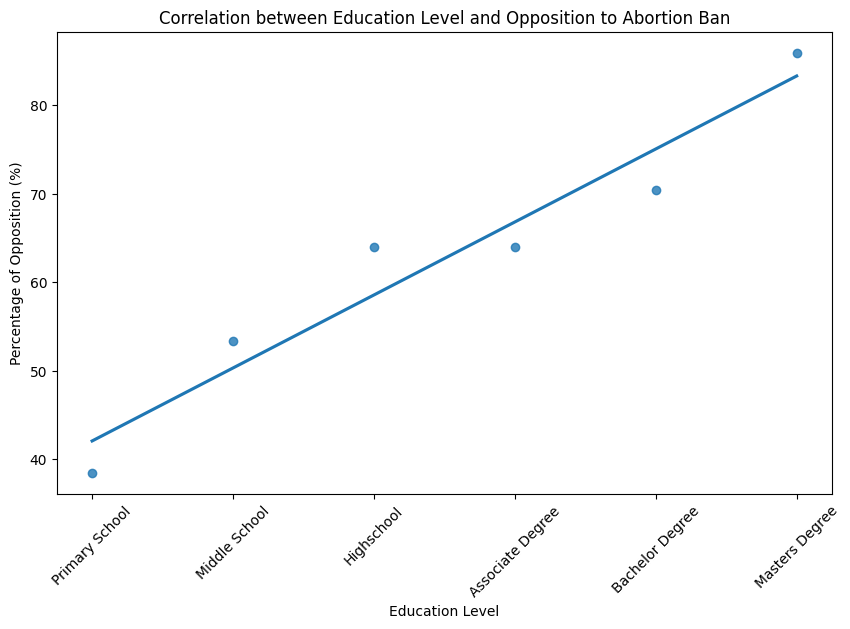

In [27]:
scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Oppose']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

plt.figure(figsize=(10, 6))
sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None)
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Percentage of Opposition (%)')
plt.title('Correlation between Education Level and Opposition to Abortion Ban')
plt.show()

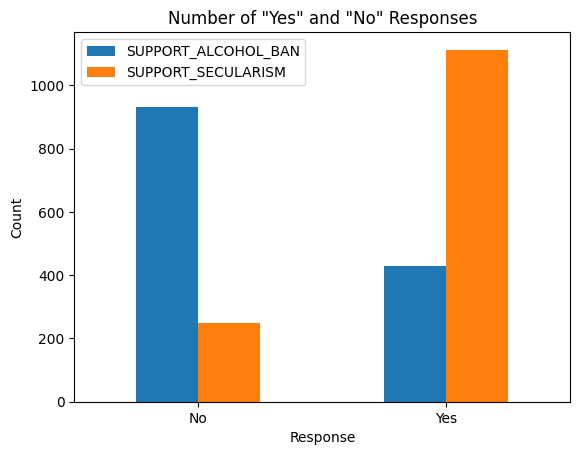

In [28]:

subset = data[['SUPPORT_ALCOHOL_BAN', 'SUPPORT_SECULARISM']]

count_yes_no = subset.apply(pd.Series.value_counts)

count_yes_no.plot(kind='bar', rot=0)

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Number of "Yes" and "No" Responses')

plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

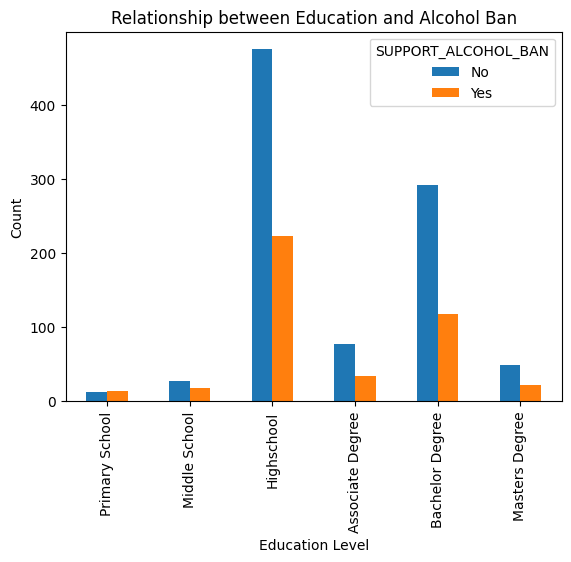

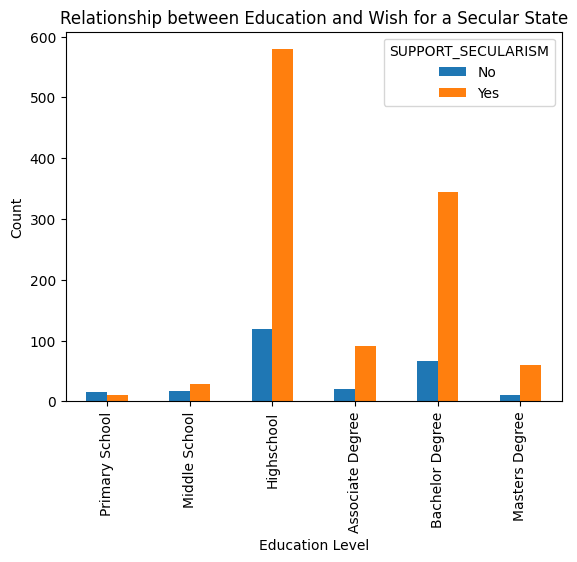

In [29]:
education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

grouped_question6 = data.groupby(['Education', 'SUPPORT_ALCOHOL_BAN']).size().unstack()

grouped_question6 = grouped_question6.reindex(education_order, axis=0)

grouped_question6.plot(kind='bar')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education and Alcohol Ban')

plt.show()

grouped_question7 = data.groupby(['Education', 'SUPPORT_SECULARISM']).size().unstack()

grouped_question7 = grouped_question7.reindex(education_order, axis=0)

grouped_question7.plot(kind='bar')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education and Wish for a Secular State')

plt.show()

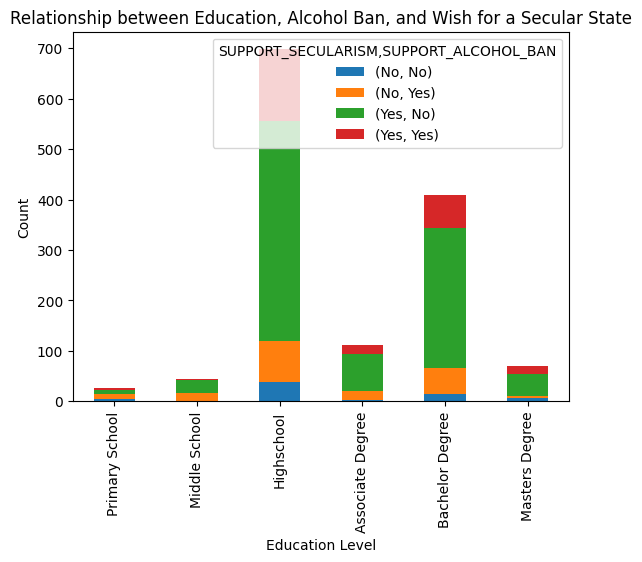

In [30]:
education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

grouped = data.groupby(['Education', 'SUPPORT_ALCOHOL_BAN', 'SUPPORT_SECULARISM']).size().unstack().unstack()

grouped = grouped.reindex(education_order)

grouped.plot(kind='bar', stacked=True)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education, Alcohol Ban, and Wish for a Secular State')

plt.show()

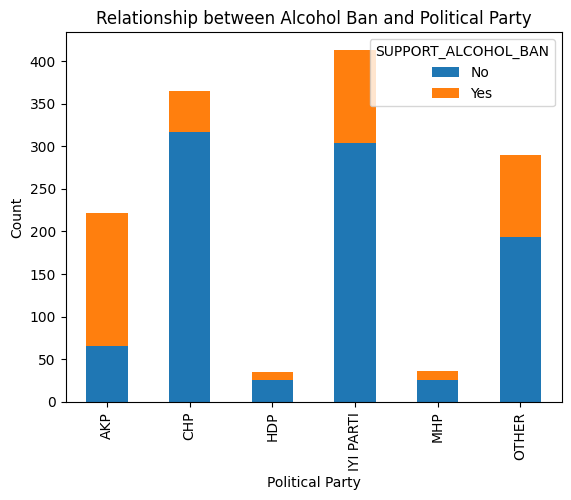

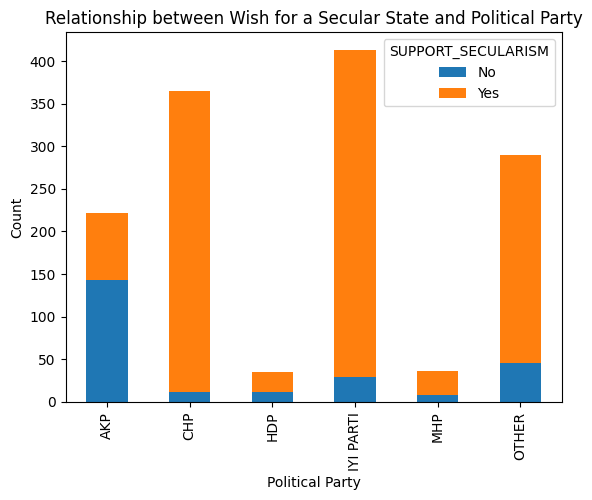

In [31]:
grouped = data.groupby(['Party', 'SUPPORT_ALCOHOL_BAN']).size().unstack()

grouped.plot(kind='bar', stacked=True)

plt.xlabel('Political Party')
plt.ylabel('Count')
plt.title('Relationship between Alcohol Ban and Political Party')

plt.show()

grouped_question7 = data.groupby(['Party', 'SUPPORT_SECULARISM']).size().unstack()

grouped_question7.plot(kind='bar', stacked=True)

plt.xlabel('Political Party')
plt.ylabel('Count')
plt.title('Relationship between Wish for a Secular State and Political Party')

plt.show()

<ipython-input-32-63d5810a6886>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


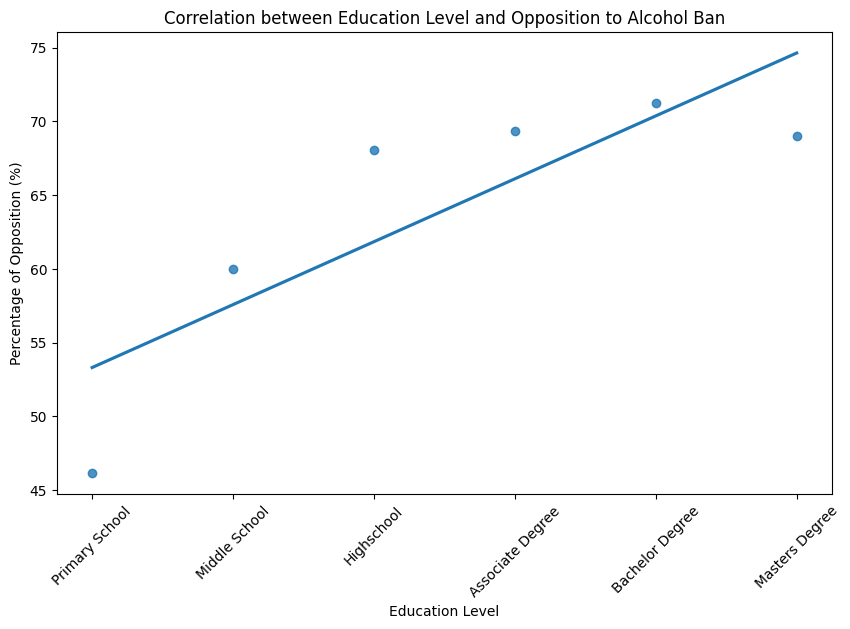

In [32]:
support_abortion_ban_edu = data[data['SUPPORT_ALCOHOL_BAN'] == 'Yes'].groupby('Education').size()
oppose_abortion_ban_edu = data[data['SUPPORT_ALCOHOL_BAN'] == 'No'].groupby('Education').size()
total_by_edu = data.groupby('Education').size()
percentage_support_edu = (support_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')
percentage_oppose_edu = (oppose_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')

percentage_support_edu['Position'] = 'Support'
percentage_oppose_edu['Position'] = 'Oppose'
percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])


education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')
scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Oppose']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

plt.figure(figsize=(10, 6))
sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None)
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Percentage of Opposition (%)')
plt.title('Correlation between Education Level and Opposition to Alcohol Ban')
plt.show()

<ipython-input-33-4834f52d7437>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


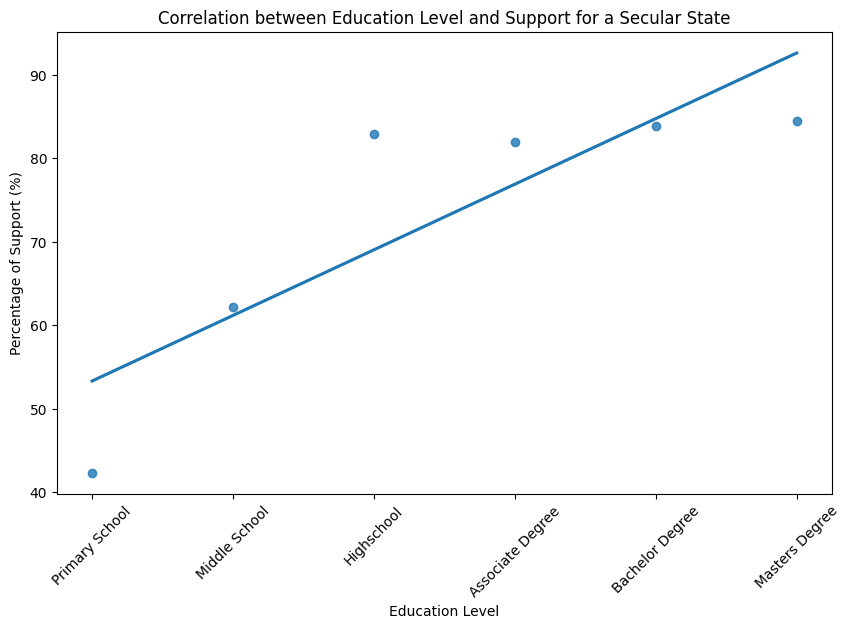

In [33]:
support_abortion_ban_edu = data[data['SUPPORT_SECULARISM'] == 'Yes'].groupby('Education').size()
oppose_abortion_ban_edu = data[data['SUPPORT_SECULARISM'] == 'No'].groupby('Education').size()
total_by_edu = data.groupby('Education').size()
percentage_support_edu = (support_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')
percentage_oppose_edu = (oppose_abortion_ban_edu / total_by_edu * 100).reset_index(name='Percentage')

percentage_support_edu['Position'] = 'Support'
percentage_oppose_edu['Position'] = 'Oppose'
percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')
scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Support']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

plt.figure(figsize=(10, 6))
sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None)
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Percentage of Support (%)')
plt.title('Correlation between Education Level and Support for a Secular State')
plt.show()

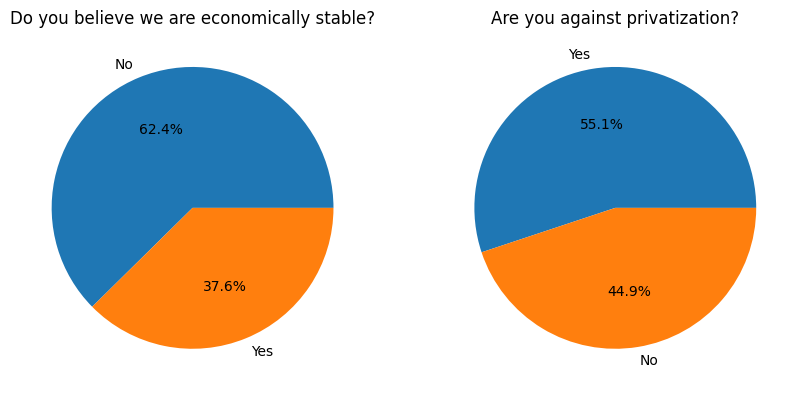

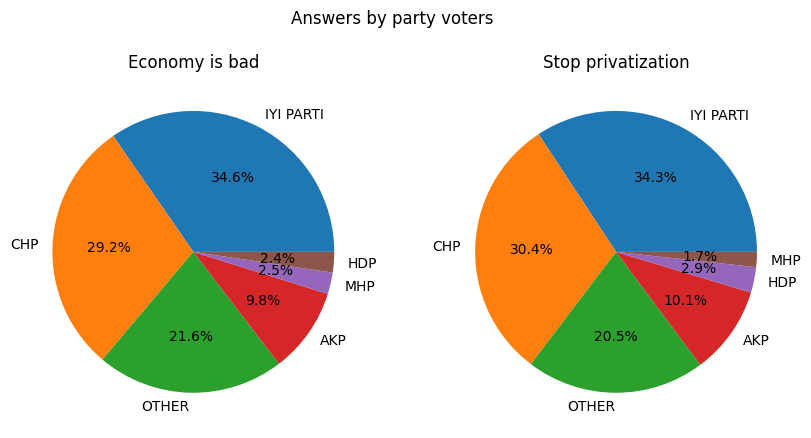

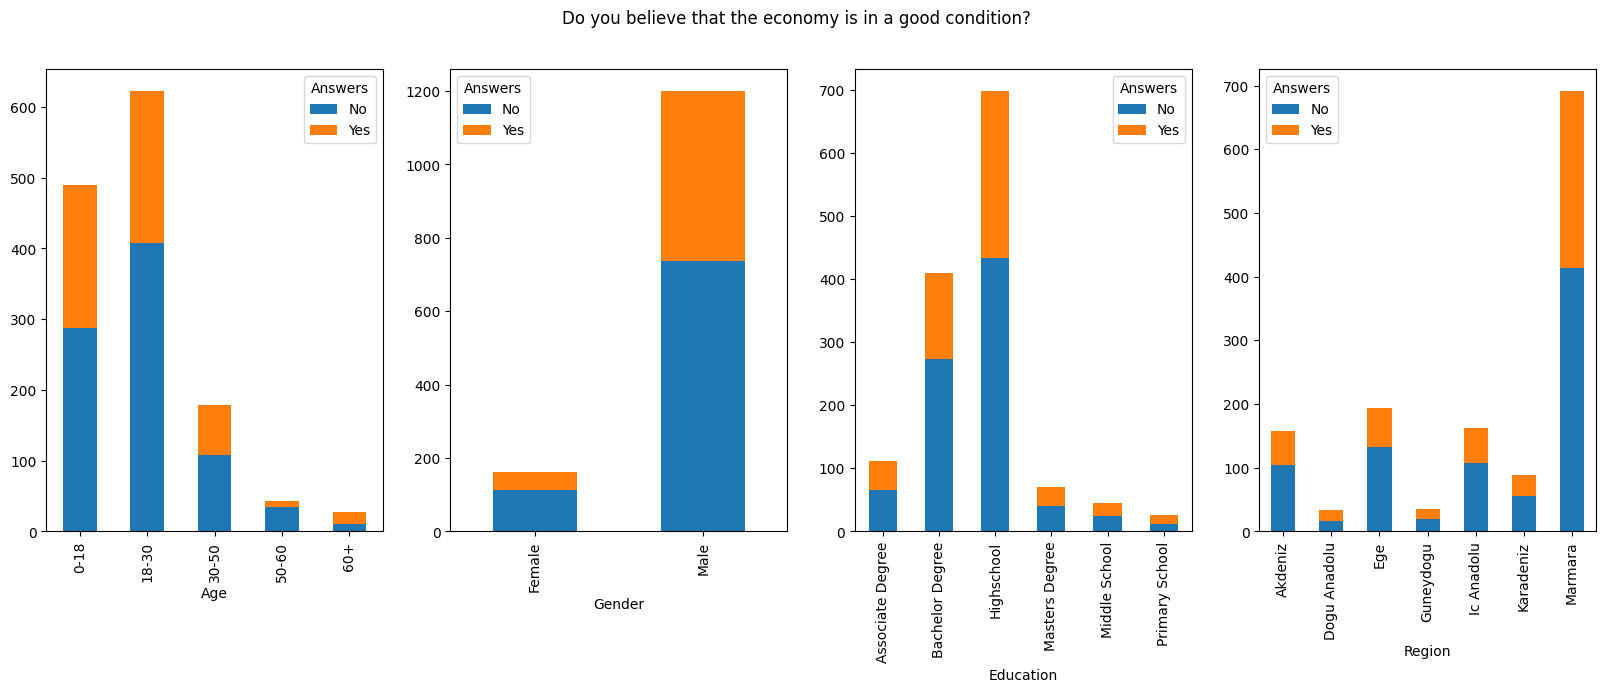

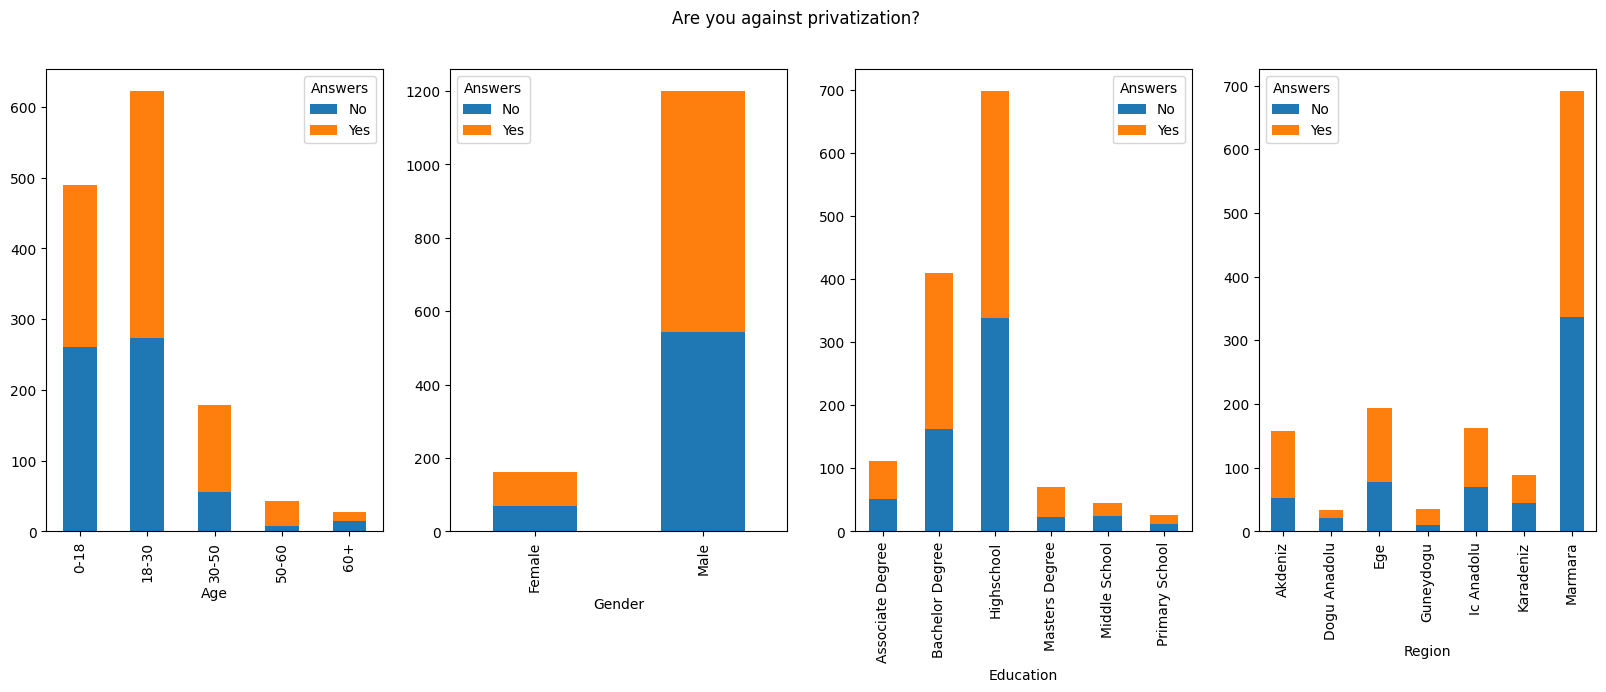

In [34]:
data_serdar=data[["Gender","Age","Region", "Education", "GOOD_ECONOMY", "STOP_PRIVATIZATION","Party"]]
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].pie(data_serdar["GOOD_ECONOMY"].value_counts(),labels=data_serdar["GOOD_ECONOMY"].value_counts().index, autopct='%1.1f%%')
axes[0].set_title("Do you believe we are economically stable?")
data_party=data_serdar[data_serdar['STOP_PRIVATIZATION']=='Yes']['Party'].value_counts()
axes[1].pie(data_serdar["STOP_PRIVATIZATION"].value_counts(),labels=data_serdar["STOP_PRIVATIZATION"].value_counts().index, autopct='%1.1f%%')
axes[1].set_title("Are you against privatization?")
plt.show()

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
data_party=data_serdar[data_serdar['GOOD_ECONOMY']=='No']['Party'].value_counts()
axes[0].pie(data_party,labels=data_party.index, autopct='%1.1f%%')
axes[0].set_title("Economy is bad")
data_party=data_serdar[data_serdar['STOP_PRIVATIZATION']=='Yes']['Party'].value_counts()
axes[1].pie(data_party,labels=data_party.index, autopct='%1.1f%%')
axes[1].set_title("Stop privatization")
plt.suptitle("Answers by party voters")
plt.show()

data_serdar=data[["Gender","Age","Region", "Education", "GOOD_ECONOMY", "STOP_PRIVATIZATION","Party"]]
list_attribute=["Age", "Education", "Region"]
list_q=["GOOD_ECONOMY", "STOP_PRIVATIZATION"]

fig, axes = plt.subplots(ncols=4, figsize=(20, 6))

data_attribute1 = data_serdar.groupby(["Age", 'GOOD_ECONOMY']).size().unstack()
data_attribute1.plot(kind='bar', stacked=True, ax=axes[0])
data_attribute2 = data_serdar.groupby(["Gender", 'GOOD_ECONOMY']).size().unstack()
data_attribute2.plot(kind='bar', stacked=True, ax=axes[1])
data_attribute3 = data_serdar.groupby(["Education", 'GOOD_ECONOMY']).size().unstack()
data_attribute3.plot(kind='bar', stacked=True, ax=axes[2])
data_attribute4 = data_serdar.groupby(["Region", 'GOOD_ECONOMY']).size().unstack()
data_attribute4.plot(kind='bar', stacked=True, ax=axes[3])
plt.suptitle("Do you believe that the economy is in a good condition?")
for i in range(0,4):
  axes[i].legend(title="Answers")
plt.show()

fig, axes = plt.subplots(ncols=4, figsize=(20, 6))

data_attribute1 = data_serdar.groupby(["Age", 'STOP_PRIVATIZATION']).size().unstack()
data_attribute1.plot(kind='bar', stacked=True, ax=axes[0])
data_attribute2 = data_serdar.groupby(["Gender", 'STOP_PRIVATIZATION']).size().unstack()
data_attribute2.plot(kind='bar', stacked=True, ax=axes[1])
data_attribute3 = data_serdar.groupby(["Education", 'STOP_PRIVATIZATION']).size().unstack()
data_attribute3.plot(kind='bar', stacked=True, ax=axes[2])
data_attribute4 = data_serdar.groupby(["Region", 'STOP_PRIVATIZATION']).size().unstack()
data_attribute4.plot(kind='bar', stacked=True, ax=axes[3])
plt.suptitle("Are you against privatization?")
for i in range(0,4):
  axes[i].legend(title="Answers")

plt.show()

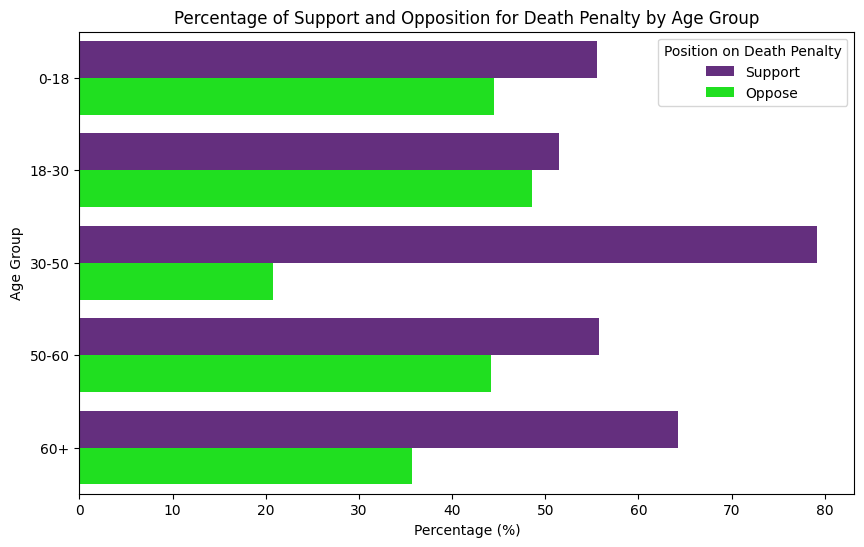

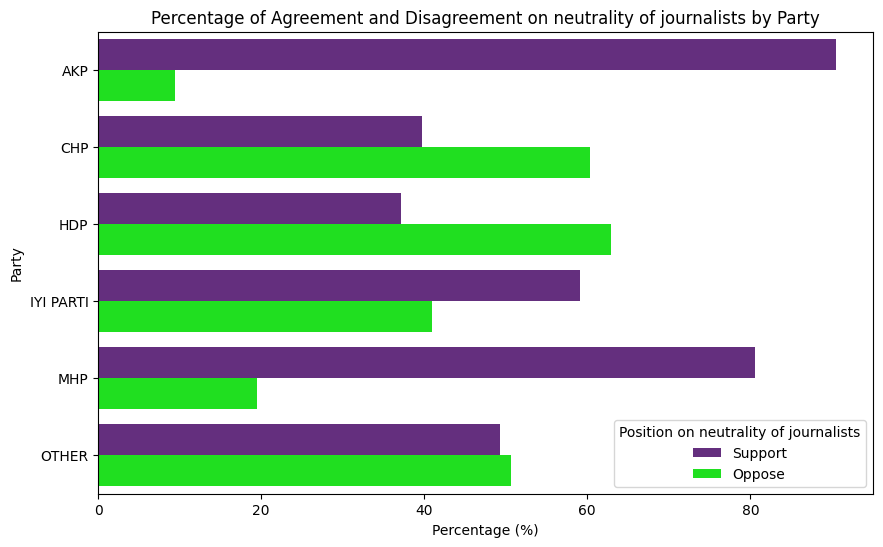

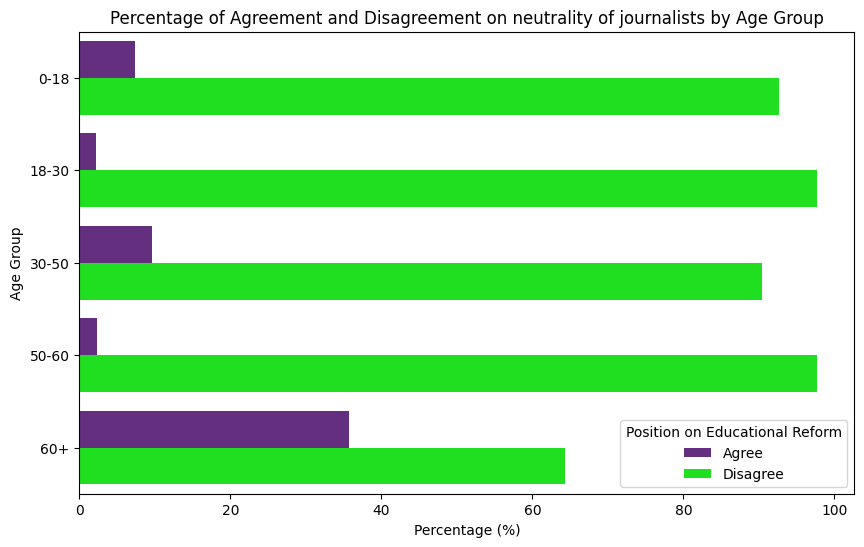

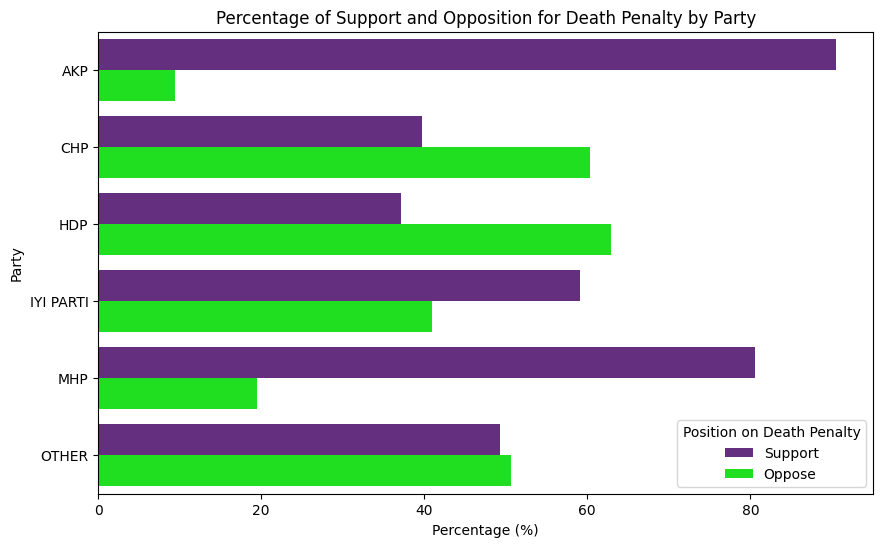

<ipython-input-35-23381c29c34b>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)


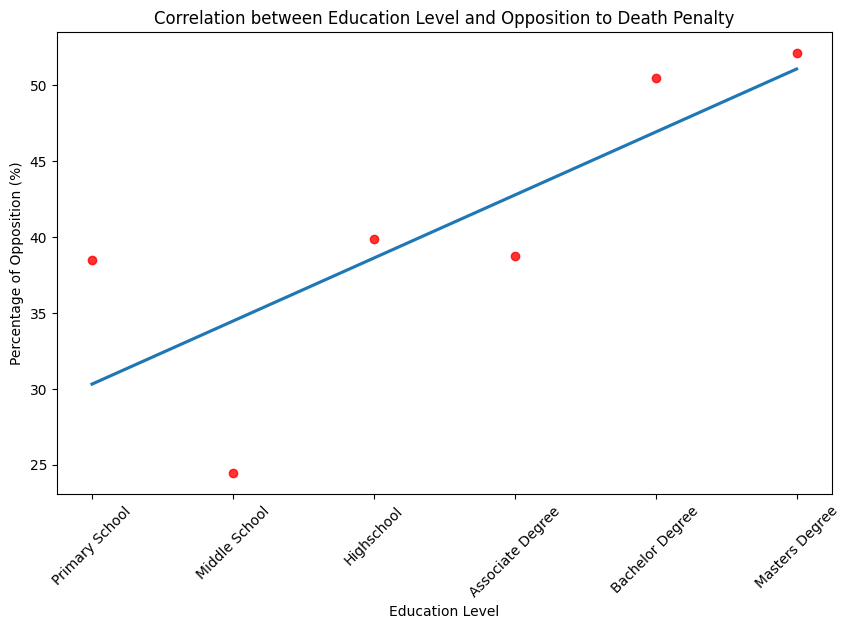

In [35]:

support_death_penalty_age = data[data['DEATH_PENALTY'] == 'Yes'].groupby('Age').size()
oppose_death_penalty_age = data[data['DEATH_PENALTY'] == 'No'].groupby('Age').size()
total_by_age = data.groupby('Age').size()
percentage_support_age = (support_death_penalty_age / total_by_age * 100).reset_index(name='Percentage')
percentage_oppose_age = (oppose_death_penalty_age / total_by_age * 100).reset_index(name='Percentage')

percentage_support_age['Position'] = 'Support'
percentage_oppose_age['Position'] = 'Oppose'
percentage_data_age = pd.concat([percentage_support_age, percentage_oppose_age])

plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Percentage', hue='Position', data=percentage_data_age, orient='h', palette=['#68228B', '#00FF00'])
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Percentage of Support and Opposition for Death Penalty by Age Group')
plt.legend(title='Position on Death Penalty')
plt.show()

support_death_ban = data[data['DEATH_PENALTY'] == 'Yes'].groupby('Party').size()
oppose_death_ban = data[data['DEATH_PENALTY'] == 'No'].groupby('Party').size()
total_by_party = data.groupby('Party').size()
percentage_support = (support_death_ban / total_by_party * 100).reset_index(name='Percentage')
percentage_oppose = (oppose_death_ban / total_by_party * 100).reset_index(name='Percentage')
percentage_support['Position'] = 'Support'
percentage_oppose['Position'] = 'Oppose'
percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Party', x='Percentage', hue='Position', data=percentage_data, orient='h', palette=['#68228B', '#00FF00'])
plt.xlabel('Percentage (%)')
plt.ylabel('Party')
plt.title('Percentage of Agreement and Disagreement on neutrality of journalists by Party')
plt.legend(title='Position on neutrality of journalists')
plt.show()

def calculate_percentage(position, position_label):
    party_position = data[data['FREE_MEDIA'] == position].groupby('Age').size()
    percentage = (party_position / total_by_party * 100).reset_index(name='Percentage')
    percentage['Position'] = position_label
    return percentage

total_by_party = data.groupby('Age').size()

percentage_support = calculate_percentage('Yes', 'Agree')
percentage_oppose = calculate_percentage('No', 'Disagree')

percentage_data = pd.concat([percentage_support, percentage_oppose])

plt.figure(figsize=(10, 6))
sns.barplot(y='Age', x='Percentage', hue='Position', data=percentage_data, orient='h', palette=['#68228B', '#00FF00'])
plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Percentage of Agreement and Disagreement on neutrality of journalists by Age Group')
plt.legend(title='Position on Educational Reform')
plt.show()
support_death_penalty_party = data[data['DEATH_PENALTY'] == 'Yes'].groupby('Party').size()
oppose_death_penalty_party = data[data['DEATH_PENALTY'] == 'No'].groupby('Party').size()
total_by_party = data.groupby('Party').size()
percentage_support_party = (support_death_penalty_party / total_by_party * 100).reset_index(name='Percentage')
percentage_oppose_party = (oppose_death_penalty_party / total_by_party * 100).reset_index(name='Percentage')
percentage_support_party['Position'] = 'Support'
percentage_oppose_party['Position'] = 'Oppose'
percentage_data_party = pd.concat([percentage_support_party, percentage_oppose_party])

plt.figure(figsize=(10, 6))
sns.barplot(y='Party', x='Percentage', hue='Position', data=percentage_data_party, orient='h', palette=['#68228B', '#00FF00'])
plt.xlabel('Percentage (%)')
plt.ylabel('Party')
plt.title('Percentage of Support and Opposition for Death Penalty by Party')
plt.legend(title='Position on Death Penalty')
plt.show()
def calculate_percentage_for_group(condition, position_label):
    group = data[data['DEATH_PENALTY'] == condition].groupby('Education').size()
    total = data.groupby('Education').size()
    percentage_group = (group / total * 100).reset_index(name='Percentage')
    percentage_group['Position'] = position_label
    return percentage_group

def create_plot(scatter_data, education_order, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Education_Num', y='Percentage', data=scatter_data, ci=None, scatter_kws={'color': 'red'})
    plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

education_order = ['Primary School', 'Middle School', 'Highschool', 'Associate Degree', 'Bachelor Degree', 'Masters Degree']

percentage_support_edu = calculate_percentage_for_group('Yes', 'Support')
percentage_oppose_edu = calculate_percentage_for_group('No', 'Oppose')

percentage_data_edu = pd.concat([percentage_support_edu, percentage_oppose_edu])
percentage_data_edu['Education'] = pd.Categorical(percentage_data_edu['Education'], categories=education_order, ordered=True)
percentage_data_edu = percentage_data_edu.sort_values('Education')

scatter_data = percentage_data_edu[percentage_data_edu['Position'] == 'Oppose']
education_mapping = {education: i for i, education in enumerate(education_order)}
scatter_data['Education_Num'] = scatter_data['Education'].map(education_mapping)

create_plot(scatter_data, education_order, 'Education Level', 'Percentage of Opposition (%)', 'Correlation between Education Level and Opposition to Death Penalty')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

mldata = pd.DataFrame()

mldata['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

mldata['Age'] = data['Age'].replace({'0-18': 0, '18-30': 1, '30-50': 2, '50-60': 3, '60+': 4})

mldata['Region'] = data['Region'].replace({'Marmara': 0, 'Guneydogu': 1, 'Akdeniz': 2, 'Dogu Anadolu': 3, 'Ic Anadolu': 4, 'Ege' : 5, 'Karadeniz' : 6})

mldata['Education'] = data['Education'].replace({
    'Primary School': 0, 'Middle School': 1, 'Highschool': 2,
    'Associate Degree': 3, 'Bachelor Degree': 4, 'Masters Degree': 5
})

mldata['Party'] = data['Party'].replace({
    'AKP': 0, 'IYI PARTI': 1, 'CHP': 2, 'HDP': 3, 'MHP': 4, 'OTHER': 5
})

question_cols = ['GOOD_ECONOMY', 'SUPPORT_EDUCATIONAL_REFORM', 'STOP_PRIVATIZATION',
                 'DEATH_PENALTY', 'FREE_MEDIA', 'SUPPORT_ALCOHOL_BAN',
                 'SUPPORT_SECULARISM', 'SUPPORT_ABORTION_BAN', 'OHAL_LIMITS_FREEDOM',
                 'SUPPORT_NEW_PARTIES']

mldata[question_cols] = data[question_cols].replace({'Yes': 1, 'No': 0})

X = mldata.drop("Party", axis=1)
y = mldata['Party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

nb_pred = nb_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)

nb_accuracy = round(accuracy_score(y_test, nb_pred), 3)
dt_accuracy = round(accuracy_score(y_test, dt_pred), 3)
rf_accuracy = round(accuracy_score(y_test, rf_pred), 3)
knn_accuracy = round(accuracy_score(y_test, knn_pred), 3)
svm_accuracy = round(accuracy_score(y_test, svm_pred), 3)

print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Decision Trees Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Support Vector Machines Accuracy:", svm_accuracy)

emir_voter_data = pd.DataFrame({
    'Gender': [0],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

ahmet_voter_data = pd.DataFrame({
    'Gender': [0],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

kagan_voter_data = pd.DataFrame({
    'Gender': [0],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

bora_voter_data = pd.DataFrame({
    'Gender': [1],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

sezin_voter_data = pd.DataFrame({
    'Gender': [1],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

nazli_voter_data = pd.DataFrame({
    'Gender': [1],
    'Age': [1],
    'Region': [0],
    'Education': [4],
    'GOOD_ECONOMY': [0],
    'SUPPORT_EDUCATIONAL_REFORM': [1],
    'STOP_PRIVATIZATION': [1],
    'DEATH_PENALTY': [0],
    'FREE_MEDIA': [1],
    'SUPPORT_ALCOHOL_BAN': [0],
    'SUPPORT_SECULARISM': [1],
    'SUPPORT_ABORTION_BAN': [0],
    'OHAL_LIMITS_FREEDOM': [1],
    'SUPPORT_NEW_PARTIES': [1]
})

party_prediction_emir = rf_classifier.predict(emir_voter_data)
party_prediction_ahmet = rf_classifier.predict(ahmet_voter_data)
party_prediction_kagan = rf_classifier.predict(kagan_voter_data)
party_prediction_bora = rf_classifier.predict(bora_voter_data)
party_prediction_sezin = rf_classifier.predict(sezin_voter_data)
party_prediction_nazli = rf_classifier.predict(nazli_voter_data)

predicted_party_emir = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_emir[0]]
predicted_party_ahmet = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_ahmet[0]]
predicted_party_kagan = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_kagan[0]]
predicted_party_bora = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_bora[0]]
predicted_party_sezin = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_sezin[0]]
predicted_party_nazli = ['AKP', 'IYI PARTI', 'CHP', 'HDP', 'MHP', 'OTHER'][party_prediction_nazli[0]]

print("")
print("Predicted Party for Emir:", predicted_party_emir)
print("Predicted Party for Ahmet:", predicted_party_ahmet)
print("Predicted Party for Kagan:", predicted_party_kagan)
print("Predicted Party for Bora:", predicted_party_bora)
print("Predicted Party for Sezin:", predicted_party_sezin)
print("Predicted Party for Nazlı:", predicted_party_nazli)

Naive Bayes Classifier Accuracy: 0.392
Decision Trees Accuracy: 0.619
Random Forest Accuracy: 0.648
K-Nearest Neighbors Accuracy: 0.549
Support Vector Machines Accuracy: 0.495

Predicted Party for Emir: IYI PARTI
Predicted Party for Ahmet: IYI PARTI
Predicted Party for Kagan: IYI PARTI
Predicted Party for Bora: CHP
Predicted Party for Sezin: CHP
Predicted Party for Nazlı: CHP
